In [2]:
import random
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib
import pandas as pd

Above I imported all the necessary libraries for the upcoming tasks.


# Task – 1: Activation Functions

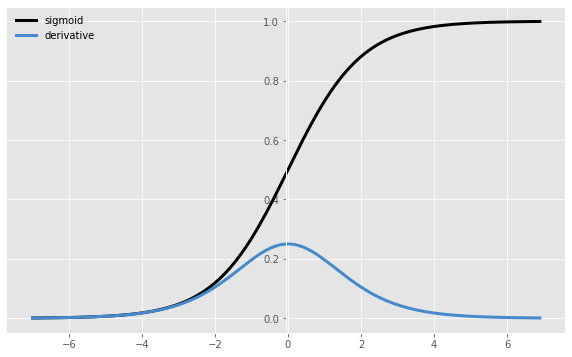

In [486]:
#sigmoid function
def sig(x):
    s=1/(1+np.exp(-x))
    der_s=s*(1-s)
    return s,der_s
x=np.arange(-7,7,0.1)
sig(x)
# Setup centered axes
fig, ax = plt.subplots(figsize=(10, 6))
ax.spines['left'].set_position('center')
# Create and show plot
ax.plot(x,sig(x)[0], color="#000000", linewidth=3, label="sigmoid")
ax.plot(x,sig(x)[1], color="#448ACC", linewidth=3, label="derivative")
ax.legend(loc="upper left", frameon=False)

Definition : The sigmoid function takes a real number and returns the output value which will be in the range of 0 to 1.

Mathematically, sigmoid is represented as: 1/(1+np.exp(-x)).

The sigmoid function produces an “S” shaped curve. Above in the figure we can see the shapes of sigmoid function and its derivative with black and blue colors respectively.



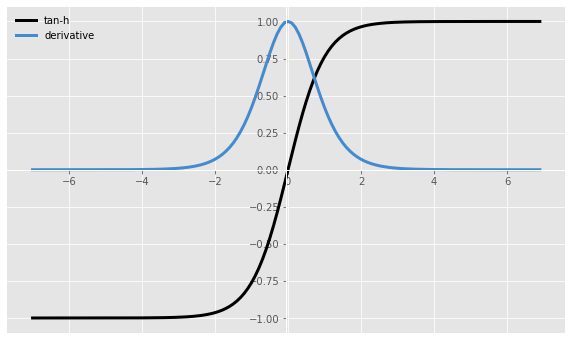

In [319]:
#tanh fucntion
def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    der_t=1-t**2
    return t,der_t
x=np.arange(-7,7,0.1)
tanh(x)

# Setup centered axes
fig, ax = plt.subplots(figsize=(10, 6))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(x,tanh(x)[0], color="#000000", linewidth=3, label="tan-h")
ax.plot(x,tanh(x)[1], color="#448ACC", linewidth=3, label="derivative")
ax.legend(loc="upper left", frameon=False)

Definition : The tan-h or hyperbolic function takes a real number and returns the output value which will be in the range of -1 to 1. As we can see it is almost similar to the sigmoid function.

Mathematically, tanh is represented as: (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)).

Even the tanh function produces an S-shaped curve, from the above figure we can see the shapes of hyperbolic function and its derivative. The shape of tanh derivative looks like a normal distribution.


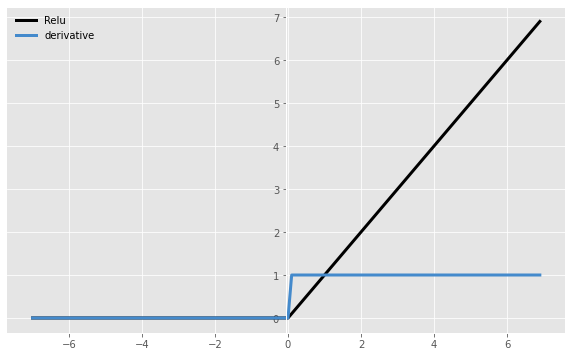

In [627]:
#relu fucntion
def relu(x):
    r=np.maximum(0,x)
    
    return r
def relu_der(x):
    der_r=np.greater(x, 0).astype(int)
    return der_r
x=np.arange(-7,7,0.1)
relu(x)

# Setup centered axes
fig, ax = plt.subplots(figsize=(10, 6))
ax.spines['left'].set_position('center')
# Create and show plot
ax.plot(x,relu(x), color="#000000", linewidth=3, label="Relu")
ax.plot(x,relu_der(x), color="#448ACC", linewidth=3, label="derivative")
ax.legend(loc="upper left", frameon=False)

Definition :  It gives an output x if x is positive and 0 otherwise. The main idea behind the ReLu activation function is to perform a threshold operation to each input element where values less than zero are set to zero.

Mathematically, RELU is represented as: RELU(x) = max(0,x).

An important limitation is that RELU function should only be used within Hidden layers of a Neural Network Model.


In [322]:
a_list = np.array(range(1, 21)) # creating an array of numbers from 1 to 20
print(a_list)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


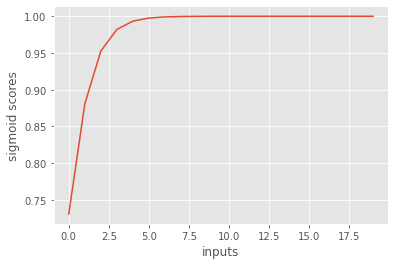

In [323]:
fgg=sig(a_list)
plt.plot(fgg[0])
plt.xlabel('inputs')
plt.ylabel('sigmoid scores')
plt.show()

In [325]:
#softmax function
def softmax(x): 
    e_x = np.exp(x - np.max(x)) 
    return e_x / e_x.sum(axis=0)

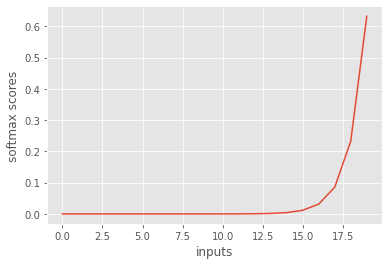

In [326]:
plt.plot(softmax(a_list))
plt.xlabel('inputs')
plt.ylabel('softmax scores')
plt.show()

From the above plots we can see that both sigmoid and softmax take opposite shapes. 

The result of a sigmoid function is between [0,1], but the summation of probabilities need not to be equal to 1. 
Moreover, the results of softmax are also between [0,1] but the summation of probabilities must be equal to 1.

This is the difference between sigmoid and softmax functions



# Task – 2: Implementing XOR 

In [15]:
#Question-2 : implementing XOR 

def sigmoid(x):
    s=1/(1+np.exp(-x))
    return s
def sigmoid_derivative(x):
    der_s=(1/(1+np.exp(-x))) * (1 - 1/(1+np.exp(-x)))
    return der_s
def Net(
    inputs,
    expected_output,
    inputLayerNeurons,
    hiddenLayerNeurons,
    outputLayerNeurons,
    epochs,
    lr,
):

    # Random weights and bias initialization
    hidden_weights = np.random.uniform(size=(inputLayerNeurons, hiddenLayerNeurons))
    hidden_bias = np.random.uniform(size=(1, hiddenLayerNeurons))
    output_weights = np.random.uniform(size=(hiddenLayerNeurons, outputLayerNeurons))
    output_bias = np.random.uniform(size=(1, outputLayerNeurons))

    print("Initializing Network Parameters:")
    print()
    print("Initial hidden weights: ", end="")
    print(*hidden_weights)
    print("Initial hidden biases: ", end="")
    print(*hidden_bias)
    print("Initial output weights: ", end="")
    print(*output_weights)
    print("Initial output biases: ", end="")
    print(*output_bias)

    # Training algorithm
    for _ in range(epochs):
        # Forward Propagation
        hidden_layer_activation = np.dot(inputs, hidden_weights)
        hidden_layer_activation += hidden_bias
        hidden_layer_output = sigmoid(hidden_layer_activation)

        output_layer_activation = np.dot(hidden_layer_output, output_weights)
        output_layer_activation += output_bias
        predicted_output = sigmoid(output_layer_activation)

        # Backpropagation
        error = expected_output - predicted_output
        d_predicted_output = error * sigmoid_derivative(predicted_output)

        error_hidden_layer = d_predicted_output.dot(output_weights.T)
        d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

        # Updating Weights and Biases
        output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
        output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * lr
        hidden_weights += inputs.T.dot(d_hidden_layer) * lr
        hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * lr
    

    return hiddenLayerNeurons,epochs,lr,hidden_weights, hidden_bias, output_weights, output_bias, predicted_output,expected_output

In [516]:
data = {'H_layers': [],
        'epochs': [],
        'lr': [],
        'Accuracy': []}
stat_df = pd.DataFrame(data=data)
def update(x):
    global stat_df
    data = {'H_layers':x[0],
            'epochs': x[1],
            'lr': x[2],
            'Accuracy': 100*np.sum(np.isclose(np.around(x[7]),x[8]))/len(x[8])}
    stat_df = stat_df.append(data, ignore_index=True)

<function matplotlib.pyplot.show(close=None, block=None)>

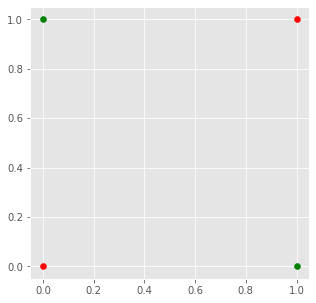

In [6]:
# Function to simulate XOR Gate
input_1=np.array([[0,1],[1,0],[0,0],[1,1]])
out_put=np.array([[1],[1],[0],[0]])
data_1=(input_1,out_put)
#plt.plot(input_1,out_put,'ro')
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="g")
ax.scatter(1, 0, color="g")
ax.scatter(1, 1, color="r")
plt.show

Color labeling is performed for the following data


In [524]:
input_1=np.array([[0,1],[1,0],[0,0],[1,1]])
out_put=np.array([[1],[1],[0],[0]])
net=Net(input_1,out_put,2,5,1,1000,2,)
update(net)

Initializing Network Parameters:

Initial hidden weights: [0.38200495 0.49131026 0.0508507  0.85441469 0.60337283] [0.46546671 0.91109352 0.22872818 0.21243251 0.90487768]
Initial hidden biases: [0.73670999 0.80228988 0.88993476 0.26393884 0.80155137]
Initial output weights: [0.98697238] [0.03505667] [0.51719506] [0.51307524] [0.46682089]
Initial output biases: [0.84126191]


# Documenting the classification parameters.

In [525]:
stat_df 

,H_layers,epochs,lr,Accuracy
0,2.0,1000.0,3.0,75.0
1,3.0,1000.0,3.0,75.0
2,3.0,10000.0,1.0,100.0
3,4.0,10000.0,1.0,100.0
4,4.0,1000.0,1.0,50.0
5,4.0,1000.0,2.0,50.0
6,5.0,1000.0,2.0,50.0


In the above data frame we can see that the neural network acheived 100 percent accuracy when the hidden layer had 3 and 4 neurons with 10000 epochs and 1.0 learning rate.

From the above observations we can deduce that for this particular instance the NN performed better when it had more than 10000 epochs with at least 3 neurons in the hidden layer.

# Plotting the input parameters using 3-D plot 

Here the inputs and outputs are updated 

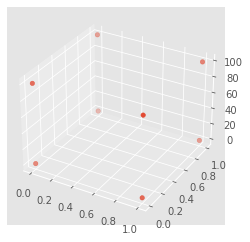

In [7]:
output_big=np.array([[0],[1],[1],[1],[1],[1],[1],[0]])

xyz=np.array([[1,1,1],[1,1,0],[1,0,1],[1,0,0],[0,1,1],[0,1,0],[0,0,1],[0,0,0]])
x=xyz[:,0]
y=xyz[:,1]
z=xyz[:,2]*100

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x,y,z)
plt.show()



In [527]:
data = {'H_layers': [],
        'epochs': [],
        'lr': [],
        'Accuracy': []}
stat_df_2 = pd.DataFrame(data=data)
def update_2(x):
    global stat_df_2
    data = {'H_layers':x[0],
            'epochs': x[1],
            'lr': x[2],
            'Accuracy': 100*np.sum(np.isclose(np.around(x[7]),x[8]))/len(x[8])}
    stat_df_2 = stat_df_2.append(data, ignore_index=True)


In [528]:
#100*np.sum(np.isclose(np.around(x[7]),x[8]))/len(x[8]) 
#For calculating the accuracy of the model.

In [541]:
net=Net(input_big,output_big,3,5,1,30000,1,)
update_2(net)

Initializing Network Parameters:

Initial hidden weights: [0.92948888 0.49203142 0.83359351 0.41203586 0.09072747] [0.87689236 0.18583322 0.39023146 0.43708102 0.5363959 ] [0.60508833 0.74779098 0.76723836 0.4435551  0.04871064]
Initial hidden biases: [0.53784865 0.07582995 0.12604865 0.53379936 0.58479338]
Initial output weights: [0.67633899] [0.18950273] [0.0054238] [0.31459077] [0.49506242]
Initial output biases: [0.36387567]


# Tuning the parameters

In [542]:
stat_df_2

,H_layers,epochs,lr,Accuracy
0,1.0,1000.0,1.0,25.0
1,2.0,1000.0,1.0,62.5
2,3.0,1000.0,1.0,50.0
3,2.0,10000.0,1.0,62.5
4,3.0,10000.0,1.0,87.5
5,3.0,10000.0,1.5,50.0
6,4.0,10000.0,1.5,50.0
7,3.0,10000.0,1.5,50.0
8,5.0,10000.0,1.0,87.5
9,5.0,30000.0,1.0,100.0


From the above data frame we can infer that for this instance the model acheived its best perfomance when it had at least 5 neurons in the hidden layer and 30000 epochs and 1.0 learning rate. 

The model was able to acheive 87.5 percent accuracy when it had only 3 neurons in the hidden layer with only 10000 epochs.

# Task – 3: Dataset Creation and classification

# Make_blobs 

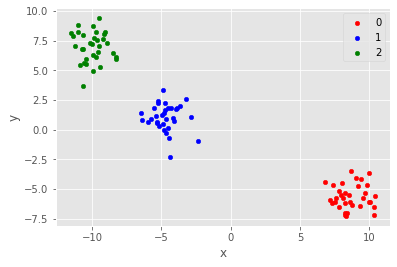

In [30]:
# Question-3 
from pandas import DataFrame
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=100, centers=3, n_features=2,cluster_std=1)
cluster_1= DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
cluster_1_color =  {0:"red", 1:"blue" , 2:"green"}
fig, ax = plt.subplots()
blobs_groupby = cluster_1.groupby("label")
for i, j in blobs_groupby:
    j.plot(ax=ax, kind="scatter", x="x", y="y", label=i, color=cluster_1_color[i])
plt.show()

# Below is the code for one hot encoding the input

In [31]:
def vectorized_result_3(j):
    v = np.zeros((100,3))
    count=0
    for i in j:
        value_1=i
        e = np.zeros((3))
        e[value_1] = 1.0
        v[count]=e
        count=count+1
    return v

def revectorized_result(j):
    predicted=j
    count_1=0
    v_1 = np.zeros((100,1))    
    for i in predicted:
        for j in range(3):
            if i[j]==1:
                v_1[count_1]=j
                count_1=count_1+1
    return v_1



The function revectorized_result can be used for turning the one hot encoded input to its normal state. This will be helpful for  transforming the predicted and expected values to its normal state and calculate the accuracy of the model.

In [23]:
cluster_1.head()

,x,y,label
0,-2.467873,0.303627,1
1,-6.677868,6.840011,2
2,-1.274357,4.147062,1
3,-6.515294,7.458673,2
4,-8.089681,6.659766,2


In [32]:
data = {'H_layers': [],
        'epochs': [],
        'lr': [],
        'Accuracy': []}
stat_df_updated = pd.DataFrame(data=data)
def update_revision(x):
    global stat_df_updated
    data = {'H_layers':x[0],
            'epochs': x[1],
            'lr': x[2],
            'Accuracy': 100*np.sum(np.isclose(revectorized_result(np.around(x[7])),revectorized_result(x[8])))/len(x[8])}
    stat_df_updated = stat_df_updated.append(data, ignore_index=True)


In [33]:
a = Y
new_Y = np.resize(a, 100).reshape(100,1)
new_Y_Y=vectorized_result_3(new_Y.astype(int))


# One hot encoding the expected values

In [34]:
new_Y_Y

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1

In [58]:
net=Net(X,new_Y_Y,
    2,
    20,
    3,
    3000,
    3,)
net
update_revision(net)



Initializing Network Parameters:

Initial hidden weights: [0.81418595 0.99710687 0.81125584 0.69288202 0.09953682 0.16634275
 0.81580103 0.1838909  0.28599029 0.87632598 0.92837375 0.17913121
 0.0637334  0.94392368 0.26093532 0.9353867  0.17184625 0.0990018
 0.57348229 0.90449715] [0.42764158 0.96042211 0.97786171 0.71133139 0.48384653 0.24161338
 0.4587131  0.35576256 0.49633435 0.22071459 0.6390098  0.8187772
 0.46557438 0.3976821  0.74768541 0.74840005 0.18688506 0.70086753
 0.05770917 0.00487256]
Initial hidden biases: [0.8299875  0.17803644 0.64522607 0.94664537 0.95990607 0.65104894
 0.39782689 0.04543265 0.11948533 0.80796087 0.42848982 0.11522536
 0.62934304 0.31104723 0.36790769 0.34305191 0.111352   0.81345784
 0.0175582  0.41455421]
Initial output weights: [0.78504947 0.06879912 0.07790502] [0.26673755 0.76095089 0.71445538] [0.94400023 0.61861535 0.79512031] [0.3493865  0.16032336 0.85982246] [0.33718018 0.5862113  0.9980488 ] [0.84897241 0.12631167 0.63962192] [0.51997454 

C:\Users\Itachi Bal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


In [59]:
stat_df_updated

,H_layers,epochs,lr,Accuracy
0,20.0,3000.0,5.0,100.0
1,2.0,3000.0,5.0,35.0
2,10.0,3000.0,5.0,100.0
3,7.0,3000.0,5.0,72.0
4,9.0,3000.0,5.0,100.0
5,12.0,3000.0,1.0,88.0
6,15.0,3000.0,1.0,46.0
7,15.0,3000.0,2.0,73.0
8,15.0,3000.0,3.0,100.0
9,14.0,3000.0,3.0,43.0


This neural network has 3 output layers as it has three output classes. 

The network performed better when the hidden neurons are increased. specifically the model performed better when the hidden neurons were 10 more. But sometimes the model performed poor even after increasing the hidden neurons to 10 or more. This model was able to acheive 100 pecent accuracy after training. 

# Make_moons

In [ ]:
from sklearn.datasets import make_moons
X,Y = make_moons(n_samples=100, noise=0.1)
cluster_2 = DataFrame(dict(x=X[:,0], y=X[:,1],label=Y))
cluster_2_color =  {0:"red", 1:"blue"}
fig, ax = plt.subplots()
blobs_groupby = cluster_2.groupby("label")
for i, j in blobs_groupby:
    j.plot(ax=ax, kind="scatter", x="x", y="y", label=i, color=cluster_2_color[i])
plt.show()

In [546]:
 a =Y
 new_Y = np.resize(a, 100).reshape(100,1)

In [547]:
data = {'H_layers': [],
        'epochs': [],
        'lr': [],
        'Accuracy': []}
stat_df_3 = pd.DataFrame(data=data)
def update_3(x):
    global stat_df_3
    data = {'H_layers':x[0],
            'epochs': x[1],
            'lr': x[2],
            'Accuracy': 100*np.sum(np.isclose(np.around(x[7]),x[8]))/len(x[8])}
    stat_df_3 = stat_df_3.append(data, ignore_index=True)

In [573]:
net=Net(X,new_Y,2,5,1,300000,2,)
update_3(net)

Initializing Network Parameters:

Initial hidden weights: [0.52866007 0.35805031 0.65935126 0.85399574 0.34652082] [0.23649569 0.48243796 0.06815629 0.89263371 0.84047735]
Initial hidden biases: [0.57350116 0.03973404 0.75353264 0.88639557 0.73258792]
Initial output weights: [0.30262895] [0.94209566] [0.26715859] [0.18438792] [0.69686906]
Initial output biases: [0.25832069]


C:\Users\Itachi Bal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


# Tuning the parameters

In [574]:
stat_df_3

,H_layers,epochs,lr,Accuracy
0,2.0,1000.0,1.0,84.0
1,3.0,1000.0,1.0,84.0
2,4.0,1000.0,1.0,84.0
3,5.0,1000.0,1.0,86.0
4,2.0,10000.0,1.0,85.0
5,3.0,10000.0,1.0,83.0
6,4.0,10000.0,1.0,86.0
7,5.0,10000.0,1.0,88.0
8,5.0,20000.0,1.0,86.0
9,5.0,30000.0,1.0,85.0


We can deduce from the above data that the average accuracy was around 84 percent. The model acheived its optimal performance around 88 percent when it had 5 neurons in the hidden layer with 10000 epochs and 1.0 learning rate.

We can also see that the model acheived an accuracy of 84 percent when the hidden layer had two neurons with 1000 epochs and 1.0 learning rate. Tuning parameters to a wide range was not that useful for this particular instance.

# Make_circles

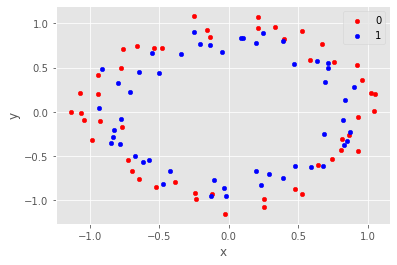

In [75]:
from sklearn.datasets import make_circles
X, Y = make_circles(n_samples=100, noise=0.1)
cluster_3 = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
cluster_3_color =  {0:"red", 1:"blue"}
fig, ax = plt.subplots()
blobs_groupby = cluster_3.groupby("label")
for i, j in blobs_groupby:
    j.plot(ax=ax, kind="scatter", x="x", y="y", label=i, color=cluster_3_color[i])
plt.show()

In [76]:
a =Y
new_Y = np.resize(a, 100).reshape(100,1)

In [77]:
data = {'H_layers': [],
        'epochs': [],
        'lr': [],
        'Accuracy': []}
stat_df_4 = pd.DataFrame(data=data)
def update_4(x):
    global stat_df_4
    data = {'H_layers':x[0],
            'epochs': x[1],
            'lr': x[2],
            'Accuracy': 100*np.sum(np.isclose(np.around(x[7]),x[8]))/len(x[8])}
    stat_df_4 = stat_df_4.append(data, ignore_index=True)

In [91]:
net=Net(X,new_Y,2,27,1,100000,1,)
update_4(net)

Initializing Network Parameters:

Initial hidden weights: [0.62601349 0.13949946 0.58981437 0.35249512 0.14211867 0.56160631
 0.48014092 0.86151383 0.87292092 0.60859094 0.05171113 0.80284555
 0.05438755 0.03003644 0.19311104 0.9557083  0.76583624 0.61538232
 0.46792181 0.27221382 0.88798687 0.19565026 0.54398805 0.44016656
 0.01295822 0.36008135 0.97108518] [0.95592951 0.85688418 0.6466313  0.82884282 0.46613824 0.78005093
 0.85297289 0.2484256  0.10403626 0.39523204 0.52432286 0.2860866
 0.25223928 0.41462301 0.30719333 0.58969543 0.32023635 0.8807889
 0.69642675 0.99489667 0.65522064 0.81178928 0.71239701 0.2927761
 0.20026921 0.61420508 0.2653669 ]
Initial hidden biases: [0.19438904 0.80594253 0.55160883 0.44366957 0.65227612 0.98611506
 0.04974682 0.37017356 0.07425669 0.21159887 0.71675642 0.76552065
 0.27555854 0.56091869 0.78109288 0.45359588 0.01955416 0.24539688
 0.38758851 0.14045717 0.25613043 0.19769279 0.60390221 0.7356205
 0.38438384 0.78638971 0.27549787]
Initial output

C:\Users\Itachi Bal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


# Tuning the parameters

In [92]:
stat_df_4

,H_layers,epochs,lr,Accuracy
0,40.0,1000.0,1.0,50.0
1,40.0,10000.0,1.0,50.0
2,10.0,10000.0,1.0,50.0
3,2.0,10000.0,1.0,50.0
4,3.0,10000.0,1.0,50.0
5,4.0,10000.0,1.0,50.0
6,5.0,10000.0,1.0,50.0
7,6.0,10000.0,1.0,50.0
8,7.0,10000.0,1.0,50.0
9,17.0,100000.0,1.0,50.0


It is quite obvious why our model was performing poor in predicting the classes, it is because the data created by "make_circles" is non-linear.

As we can see from the parameter tuning data that the maximum accuracy acheived was around 53 percent.

# Task – 4: Working with Mnist dataset

In [301]:
class Network(object):
    def __init__(self, sizes):
        
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a) + b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
    
        if test_data:
            n_test = len(test_data)
        n = len(list(training_data))
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k : k + mini_batch_size]
                for k in range(0, n, mini_batch_size)
            ]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print(
                    "Epoch {0}: {1} / {2}".format(j, self.evaluate(test_data), n_test)
                )
            else:
                print("Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [
            w - (eta / len(mini_batch)) * nw for w, nw in zip(self.weights, nabla_w)
        ]
        self.biases = [
            b - (eta / len(mini_batch)) * nb for b, nb in zip(self.biases, nabla_b)
        ]

    def backprop(self, x, y):
       
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x]  # list to store all the activations, layer by layer
        zs = []  # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l + 1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l - 1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        
        test_results = [(np.argmax(self.feedforward(x)), y) for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        
        return output_activations - y

def sigmoid(x):
    s=1/(1+np.exp(-x))
    return s
def sigmoid_prime(x):
    der_s=(1/(1+np.exp(-x))) * (1 - 1/(1+np.exp(-x)))
    return der_s

def vectorized_result(j):
    v = np.zeros((70000,10,1))
    count=0
    for i in j:
        value_1=i
        e = np.zeros((10,1))
        e[value_1] = 1.0
        v[count]=e
        count=count+1
    return v


The above lines of code consists of a class named "Network" which has multiple functions for performing back propagation, converting the data into mini-batches, calculating Cost function ETC.

In addition to this, I have added three functions which can calculate sigmoid and its derivative scores for a particular data.

And also another function which can vectorize a integer into a (10,1) unit vector, which resembles that following integer.


In [302]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)


Here I have loaded the appropriate data into the "mnist" variable which will be used in my further program.

In [306]:
X_input = mnist['data']
Y_input = mnist['target']

Above I have taken the necessary features "data" and "target" into the following variables.

In [307]:
#a = Y
#new_Y = np.resize(a, 70000).reshape(70000,1)
#print(new_Y.shape)
#new_Y

# Training & Testing data sets

In [308]:
#### training
X_train=X_input.reshape(70000,784,1)[:60000]
Y_train=vectorized_result(Y_input[:60000].astype(int))
training=list(zip(X_train,Y_train))

#### testing
X_test=X_input.reshape(70000,784,1)[60000:]
Y_test=Y_input[60000:].astype(int)
testing=list(zip(X_test,Y_test))

In this part of snippet, first I have converted each and every element of training and testing inputs into a three dimensional array of (70000,784,1). 

Then I have vectorized only the training expected outputs and left the testing expected outputs as it is.

I have also converted the data type of expected outputs to "int", as they were in string format.

Finally, I have converted the training and testing data set into list of tuples(x,y) respectively.



# Displaying sample images

For displaying the sample images I have taken random input values which are in the form of (784,) and converted them to (28,28).
Now I have used the "imshow" function to plot the image using their pixel gradient values.



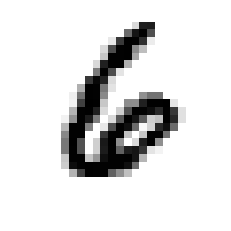

In [309]:
image_sample=X_input[13].reshape(28,28)
image_sample
plt.imshow(image_sample,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

(-0.5, 27.5, 27.5, -0.5)

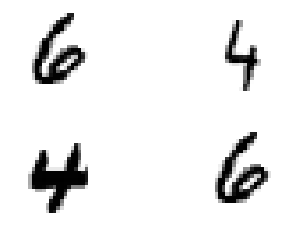

In [624]:
fig,a =  plt.subplots(2,2)

a[0][0].imshow(image_sample,cmap=matplotlib.cm.binary,interpolation="nearest")
a[0][0].axis("off")
a[0][1].imshow(X_input[3838].reshape(28,28),cmap=matplotlib.cm.binary,interpolation="nearest")
a[0][1].axis("off")
a[1][0].imshow(X_input[1345].reshape(28,28),cmap=matplotlib.cm.binary,interpolation="nearest")
a[1][0].axis("off")
a[1][1].imshow(X_input[13].reshape(28,28),cmap=matplotlib.cm.binary,interpolation="nearest")
a[1][1].axis("off")

# Applying the "Network" to Mnist data

We can introduce our desired architecture for our Network by passing on the inputs to the Network object in the form of a list.


The function SGD stands for stochastic gradient descent, in this function we pass the input parameters such as training, testing, number of epochs, learning rate and mini-batches.

Finally we can see how many images are correctly classified for every epoch, we can also make an estimate regarding the accuracy of the Network.

In [481]:
net = Network([784, 3, 10])
net.SGD(training, 30, 7, 1, test_data=testing)

C:\Users\Itachi Bal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
C:\Users\Itachi Bal\Anaconda3\lib\site-packages\ipykernel_launcher.py:120: RuntimeWarning: overflow encountered in exp


Epoch 0: 1010 / 10000
Epoch 1: 1010 / 10000
Epoch 2: 1135 / 10000
Epoch 3: 1135 / 10000
Epoch 4: 1135 / 10000
Epoch 5: 1010 / 10000
Epoch 6: 1028 / 10000
Epoch 7: 1028 / 10000
Epoch 8: 982 / 10000
Epoch 9: 1028 / 10000
Epoch 10: 974 / 10000
Epoch 11: 1032 / 10000
Epoch 12: 1028 / 10000
Epoch 13: 974 / 10000
Epoch 14: 1028 / 10000
Epoch 15: 980 / 10000
Epoch 16: 1010 / 10000
Epoch 17: 1028 / 10000
Epoch 18: 1135 / 10000
Epoch 19: 1010 / 10000
Epoch 20: 1135 / 10000
Epoch 21: 1135 / 10000
Epoch 22: 1028 / 10000
Epoch 23: 958 / 10000
Epoch 24: 1135 / 10000
Epoch 25: 1009 / 10000
Epoch 26: 1135 / 10000
Epoch 27: 974 / 10000
Epoch 28: 974 / 10000
Epoch 29: 1009 / 10000


The following Neural network deployed above has an architecture of (784,3,10). Which means it has 784 input neurons, 3 neurons in the hidden layer and 10 output neurons. 

This NN model had an final accuracy close 10 percent. 




In [484]:
net = Network([784, 30, 10])
net.SGD(training, 30, 50, 1, test_data=testing)

C:\Users\Itachi Bal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
C:\Users\Itachi Bal\Anaconda3\lib\site-packages\ipykernel_launcher.py:120: RuntimeWarning: overflow encountered in exp


Epoch 0: 5086 / 10000
Epoch 1: 6300 / 10000
Epoch 2: 6496 / 10000
Epoch 3: 6736 / 10000
Epoch 4: 6490 / 10000
Epoch 5: 6807 / 10000
Epoch 6: 7105 / 10000
Epoch 7: 7020 / 10000
Epoch 8: 6972 / 10000
Epoch 9: 6978 / 10000
Epoch 10: 7015 / 10000
Epoch 11: 7397 / 10000
Epoch 12: 7412 / 10000
Epoch 13: 7680 / 10000
Epoch 14: 7483 / 10000
Epoch 15: 7376 / 10000
Epoch 16: 7326 / 10000
Epoch 17: 7418 / 10000
Epoch 18: 7508 / 10000
Epoch 19: 7802 / 10000
Epoch 20: 7780 / 10000
Epoch 21: 7924 / 10000
Epoch 22: 8069 / 10000
Epoch 23: 8132 / 10000
Epoch 24: 8133 / 10000
Epoch 25: 7997 / 10000
Epoch 26: 7781 / 10000
Epoch 27: 7806 / 10000
Epoch 28: 7816 / 10000
Epoch 29: 7517 / 10000


The NN deployed above has an architecture of (784,30,10). Which means it has 784 input neurons, 30 neurons in the hidden layer and 10 output neurons. 

This NN model had an final accuracy around 75.17 percent. We can also observe that there is a great increase in the accuracy of the NN when I increased the number of neurons in the hidden layer. 

In [487]:
net = Network([784, 30, 10])
net.SGD(training, 20, 50, 1, test_data=testing)

C:\Users\Itachi Bal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
C:\Users\Itachi Bal\Anaconda3\lib\site-packages\ipykernel_launcher.py:120: RuntimeWarning: overflow encountered in exp


Epoch 0: 4427 / 10000
Epoch 1: 5409 / 10000
Epoch 2: 5739 / 10000
Epoch 3: 5733 / 10000
Epoch 4: 6418 / 10000
Epoch 5: 6837 / 10000
Epoch 6: 6817 / 10000
Epoch 7: 7421 / 10000
Epoch 8: 7457 / 10000
Epoch 9: 7419 / 10000
Epoch 10: 7309 / 10000
Epoch 11: 7597 / 10000
Epoch 12: 7433 / 10000
Epoch 13: 7650 / 10000
Epoch 14: 7706 / 10000
Epoch 15: 7897 / 10000
Epoch 16: 7914 / 10000
Epoch 17: 7981 / 10000
Epoch 18: 7928 / 10000
Epoch 19: 7601 / 10000


This architecture of NN is some what similar to the second archictecture but here I have reduced the number of epochs to 20, yet still the NN gave an accuracy of 76 percent. 

In [626]:
net = Network([784,10])
net.SGD(training, 30, 50, 5, test_data=testing)

C:\Users\Itachi Bal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
C:\Users\Itachi Bal\Anaconda3\lib\site-packages\ipykernel_launcher.py:120: RuntimeWarning: overflow encountered in exp


Epoch 0: 982 / 10000
Epoch 1: 982 / 10000
Epoch 2: 982 / 10000
Epoch 3: 982 / 10000
Epoch 4: 982 / 10000
Epoch 5: 982 / 10000
Epoch 6: 982 / 10000
Epoch 7: 982 / 10000
Epoch 8: 982 / 10000
Epoch 9: 982 / 10000
Epoch 10: 982 / 10000
Epoch 11: 982 / 10000
Epoch 12: 982 / 10000
Epoch 13: 982 / 10000
Epoch 14: 982 / 10000
Epoch 15: 982 / 10000
Epoch 16: 982 / 10000
Epoch 17: 982 / 10000
Epoch 18: 982 / 10000
Epoch 19: 982 / 10000
Epoch 20: 982 / 10000
Epoch 21: 982 / 10000
Epoch 22: 982 / 10000
Epoch 23: 982 / 10000
Epoch 24: 982 / 10000
Epoch 25: 982 / 10000
Epoch 26: 982 / 10000
Epoch 27: 982 / 10000
Epoch 28: 982 / 10000
Epoch 29: 982 / 10000


Above NN has 784 input neurons and 10 output neurons only, it has no hidden layer. It has acheived an accuracy of 9.82 percent.

# Conclusion

Finally, the NN has acheived an accuracy around 84 percent after tuning the parameters. An overall observation is that, 1.0 learning rate is an ideal value for almost every instance of training. Moreover, the Network performed well in classifying the images. 